In [1]:
from pathlib import Path
from indigo import Indigo
import numpy as np
import pandas as pd
import asyncio
import shutil

from substrucure_finder import BucketsInitializer
from substrucure_finder import SearchEngine, ThreadPoolSearchEngine
from substrucure_finder import DbFilesystem

import fp_utils
from fp_utils.finders import Finder
from fp_utils.tests import FinderSpeedTester
from fp_utils.catch_time import CatchTime

In [2]:
fp_utils.settings.init_fp_utils()

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [3]:
base_drives_dir = Path('../data/drives/')
data_dirs = [base_drives_dir / str(i) for i in range(1, 4 + 1)]
other_dir = '../data/drives/0/'
db_fs = DbFilesystem(data_dirs, other_dir)

In [4]:
zero_columns_name = '../data/zero_columns'

# Build structure

In [11]:
bt_cols_cnt = 120
col_choice_cnt = 1000
raw_db_name = 'raw_db_2'
db_name = 'test_db'

In [12]:
db_tree_path = db_fs.tree_path(db_name)
db_tree_path.parent.mkdir(parents=True, exist_ok=True)
with db_fs.tree_path(raw_db_name).open('rb') as fp_in:
    with db_tree_path.open('wb') as fp_out:
        shutil.copyfileobj(fp_in, fp_out)

In [13]:
initializer = BucketsInitializer(db_fs, raw_db_name, db_name, columns_count=bt_cols_cnt)

In [14]:
%%time
initializer.init_buckets()

Start init 1227
Start init 226
Start init 1045Start init 3175

Finish init 1227
Start init 1500
Finish init 3175Finish init 1045
Start init 2998

Start init 2357
Finish init 226
Start init 1201
Finish init 2998
Start init 3108
Finish init 2357
Start init 1992
Finish init 3108
Start init 3271
Finish init 1201
Start init 2283
Finish init 1500
Start init 2129
Finish init 3271
Start init 1016
Finish init 1992
Start init 2019
Finish init 2283
Start init 1200
Finish init 2129
Start init 2127
Finish init 1016
Start init 3280
Finish init 1200
Start init 3761
Finish init 2127
Start init 2905
Finish init 2019
Start init 1414
Finish init 3280
Start init 3052
Finish init 3761
Start init 2284
Finish init 2905
Start init 1425
Finish init 1414
Start init 1846
Finish init 3052
Start init 470
Finish init 2284
Start init 1742
Finish init 1425
Start init 2587
Finish init 1846
Start init 1022
Finish init 1742
Start init 295
Finish init 2587
Start init 1168
Finish init 470
Start init 472
Finish init 1022
S

Finish init 141
Start init 298
Finish init 1275
Start init 336
Finish init 2849
Start init 2859
Finish init 3939
Start init 2841
Finish init 298
Start init 522
Finish init 336
Start init 2033
Finish init 2859
Start init 639
Finish init 522
Start init 2617
Finish init 2841
Start init 1356
Finish init 2033
Start init 909
Finish init 909Finish init 1356
Start init 3418

Start init 1550
Finish init 639
Start init 1929
Finish init 2617
Start init 783
Finish init 3418
Start init 2562
Finish init 1550
Start init 795
Finish init 783
Start init 1656
Finish init 1929
Start init 434
Finish init 2562
Start init 358
Finish init 434
Start init 669
Finish init 1656
Start init 3430
Finish init 795
Start init 3817
Finish init 358
Start init 2735
Finish init 669
Start init 3689
Finish init 3430
Start init 579
Finish init 3817
Start init 1836
Finish init 3689
Start init 2242
Finish init 2735
Start init 3151
Finish init 579
Start init 312
Finish init 1836
Start init 3074
Finish init 2242
Start init 1705
F

Finish init 2616
Start init 4062
Finish init 3698
Start init 1900
Finish init 784
Start init 2555
Finish init 923
Start init 1267
Finish init 4062
Start init 2691
Finish init 1900
Start init 1763
Finish init 2555
Start init 1359
Finish init 1267
Start init 3779
Finish init 2691
Start init 547
Finish init 1763
Start init 1510
Finish init 1359
Start init 3542
Finish init 3779
Start init 1502
Finish init 547
Start init 3794
Finish init 1510
Start init 431
Finish init 3542
Start init 3498
Finish init 3794
Start init 1885
Finish init 1502
Start init 3778
Finish init 431
Start init 2313
Finish init 3498
Start init 1672
Finish init 1885
Start init 3903
Finish init 3778
Start init 2414
Finish init 2313
Start init 1926
Finish init 1672
Start init 2133
Finish init 3903
Start init 754
Finish init 2414
Start init 2541
Finish init 1926
Start init 3007
Finish init 2133
Start init 1647
Finish init 754
Start init 2458
Finish init 2541
Start init 1936
Finish init 3007
Start init 2492
Finish init 1647
S

Finish init 3614
Start init 2892
Finish init 518
Start init 3473
Finish init 155
Start init 3284
Finish init 3419
Start init 2868
Finish init 2892
Start init 3341
Finish init 3473
Start init 3959
Finish init 3284
Start init 2348
Finish init 2868
Start init 1658
Finish init 3341
Start init 266
Finish init 3959
Start init 238
Finish init 2348
Start init 2649
Finish init 1658
Start init 1247
Finish init 266
Start init 1640
Finish init 238
Start init 1762
Finish init 1247
Start init 2318
Finish init 2649
Start init 491
Finish init 1640
Start init 3729
Finish init 1762
Start init 3804
Finish init 491
Start init 3574
Finish init 2318
Start init 3344
Finish init 3729
Start init 2397
Finish init 3804
Start init 3972
Finish init 3574
Start init 2712
Finish init 3344
Start init 1163
Finish init 2397
Start init 1991
Finish init 3972
Start init 3660
Finish init 2712
Start init 2850
Finish init 1163
Start init 3504
Finish init 1991
Start init 3152
Finish init 2850
Start init 838
Finish init 3660
St

Finish init 2292
Start init 3364
Finish init 549
Start init 1390
Finish init 696
Start init 326
Finish init 3496
Start init 1627
Finish init 3364
Start init 2537
Finish init 326
Start init 2909
Finish init 1390
Start init 2594
Finish init 1627
Start init 3305
Finish init 2537
Start init 3870
Finish init 2909
Start init 2467
Finish init 2594
Start init 3019
Finish init 3870
Start init 1468
Finish init 3305
Start init 3801
Finish init 2467
Start init 2457
Finish init 3019
Start init 1183
Finish init 1468
Start init 3792
Finish init 3801
Start init 3589
Finish init 1183
Start init 2143
Finish init 2457
Start init 2659
Finish init 3792
Start init 3558
Finish init 3589
Start init 1821
Finish init 2659
Start init 2394
Finish init 2143
Start init 1412
Finish init 3558
Start init 2559
Finish init 1821
Start init 3490
Finish init 2394
Start init 2766
Finish init 1412
Start init 3406
Finish init 2559
Start init 672
Finish init 3490
Start init 637
Finish init 2766
Start init 1544
Finish init 672


Finish init 2216
Start init 2383
Finish init 3317
Start init 526
Finish init 2899
Start init 3627
Finish init 3427
Start init 834
Finish init 2383
Start init 2359
Finish init 834
Start init 1182
Finish init 526
Start init 2445
Finish init 3627
Start init 969
Finish init 2359
Start init 1246
Finish init 1182
Start init 189
Finish init 969
Start init 4038
Finish init 2445
Start init 1924
Finish init 1246
Start init 439
Finish init 189
Start init 3346
Finish init 1924
Start init 4011
Finish init 4038
Start init 3362
Finish init 439
Start init 2983
Finish init 3346
Start init 907
Finish init 4011
Start init 3948
Finish init 3362
Start init 325
Finish init 2983
Start init 3534
Finish init 907
Start init 3780
Finish init 3948
Start init 2490
Finish init 3780Finish init 325

Start init 273
Start init 720
Finish init 3534
Start init 1083
Finish init 1083
Start init 2372
Finish init 720
Start init 3954
Finish init 2490Finish init 273
Start init 2898

Start init 2942
Finish init 2372
Start init 

Finish init 2690
Start init 3382
Finish init 2937
Start init 2879
Finish init 2740
Start init 2968
Finish init 2174
Start init 2510
Finish init 2879
Start init 1886
Finish init 3382
Start init 1955
Finish init 2510
Start init 1616
Finish init 2968
Start init 2716
Finish init 1955
Start init 2684
Finish init 1886
Start init 1549
Finish init 1616
Start init 231
Finish init 2716
Start init 3599
Finish init 2684
Start init 1268
Finish init 231
Start init 3533
Finish init 3599
Start init 1816
Finish init 1549
Start init 3940
Finish init 1268
Start init 2798
Finish init 3533
Start init 1681
Finish init 3940
Start init 3853
Finish init 1816
Start init 525
Finish init 1681
Start init 2412
Finish init 2798
Start init 267
Finish init 3853
Start init 4049
Finish init 525
Start init 808
Finish init 2412
Start init 1600
Finish init 267
Start init 2298
Finish init 4049
Start init 2749
Finish init 808
Start init 2933
Finish init 1600
Start init 1126
Finish init 2298
Start init 2444
Finish init 2749
S

Finish init 1919
Start init 244
Finish init 3953
Start init 3849
Finish init 743
Start init 1595
Finish init 2731
Start init 3619
Finish init 244
Start init 3032
Finish init 1595
Start init 1067
Finish init 3849
Start init 3797
Finish init 3619
Start init 3626
Finish init 3032
Start init 235
Finish init 3797
Start init 3468
Finish init 1067
Start init 1180
Finish init 3626
Start init 3283
Finish init 235
Start init 335
Finish init 3468
Start init 4074
Finish init 1180
Start init 259
Finish init 335
Start init 1004
Finish init 3283
Start init 1796
Finish init 4074
Start init 1283
Finish init 259
Start init 2922
Finish init 1004
Start init 2572
Finish init 1796
Start init 249
Finish init 1283
Start init 3676
Finish init 2572
Start init 2741
Finish init 2922
Start init 3088
Finish init 249
Start init 3791
Finish init 2741
Start init 3570
Finish init 3676
Start init 4050
Finish init 3088
Start init 1346
Finish init 3791
Start init 218
Finish init 3570
Start init 2739
Finish init 1346
Start

Finish init 3394
Start init 3986
Finish init 1870Finish init 2423
Start init 2008

Start init 2538
Finish init 2008
Start init 914
Finish init 2538Finish init 3986
Start init 2632

Start init 373
Finish init 914
Start init 2614
Finish init 373Finish init 2632
Start init 2446

Start init 1181
Finish init 2614
Start init 1621
Finish init 1181
Start init 3197
Finish init 2446
Start init 953
Finish init 1621
Start init 3998
Finish init 3197
Start init 3213
Finish init 953
Start init 2936
Finish init 3213
Finish init 3998
Start init 600
Finish init 2936
Start init 443
Finish init 443
Start init 309
Finish init 600
Start init 1761
Finish init 1761
Start init 3149
Finish init 309
Start init 937
Finish init 3149
Finish init 937
CPU times: user 20min 12s, sys: 11.2 s, total: 20min 23s
Wall time: 19min 55s


# Search Queries

In [5]:
with open(zero_columns_name, 'r') as f:
    zero_columns = list(map(int, f.read().split()))
assert list(sorted(zero_columns)) == zero_columns

In [6]:
full_columns = list(sorted(set(range(3736)) - set(zero_columns)))

In [7]:
def bin_format(number, num_of_bits=3736):
    fp = list(map(int, list(bin(int(number, 16))[2:].zfill(num_of_bits))))
    return np.fromiter(fp, dtype=int)

In [8]:
def smiles_to_fingerprint(smiles):
    indigo_mol_to_test = Indigo().loadMolecule(smiles)
    full_fp = bin_format(indigo_mol_to_test.fingerprint("sub").toString())
    return np.fromiter(pd.Series(full_fp)[full_columns].values, dtype=bool)

In [9]:
@CatchTime("search")
def search(smiles: str, finder: Finder, ans_count=None):
    fp = smiles_to_fingerprint(smiles)
    return list(finder.find(fp, ans_count))

In [10]:
class ComplexFinder(SearchEngine, Finder):
    def find_all(self, fp):
        return self.search(fp)

In [11]:
class ThreadPoolFinder(ThreadPoolSearchEngine, Finder):   
    def find_all(self, fp):
        return self.search(fp)

In [12]:
with open('../data/pubchem_994_queries.txt', 'r') as f:
    queries = list(map(lambda x: x.split()[0], f.read().strip().split('\n')))

In [13]:
len(queries), queries[:10]

(157,
 ['Cc1c[n]c2[nH]ccc2c1Cl',
  'OC(=O)c1c[n]c2[nH]ccc2c1Cl',
  'Cc1c(Cl)c[n]c2[nH]ccc21',
  'Oc1c[n]c2[nH]ccc2c1Cl',
  'N[C@@H](C[S@](=O)CCO)C(O)=O',
  'OC(=O)c1ccc2[nH]ccc2[n]1',
  'N[C@@H](C[S@@](=O)CCO)C(O)=O',
  'COC(=O)[C@@H](O)CC([O-])=O',
  'OC(=O)c1[n]ccc2[nH]ccc21',
  'CC[NH2+]CC(C)C'])

In [14]:
queries_fp = [smiles_to_fingerprint(smiles) for smiles in queries]

In [15]:
finder = ComplexFinder(db_fs, 'test_db')

0.024s -- ComplexFinder init time


In [22]:
speed_tester = FinderSpeedTester([mcc_120c_500k_h250, mcc_120c_500k_h500, mcc_120c_500k_h750, mcc_120c_500k_h1000, mcc_120c_500k_h2600])

In [23]:
stat = speed_tester.test_all(queries_fp, ans_count=10, verbose=True)

-----
Test #000
0.654 -- ComplexFinder_140711884637616
0.678 -- ComplexFinder_140711883969376
0.634 -- ComplexFinder_140711883833008
0.705 -- ComplexFinder_140711883980512
0.314 -- ComplexFinder_140711874055328
-----
Test #001
0.184 -- ComplexFinder_140711884637616
0.189 -- ComplexFinder_140711883969376
0.184 -- ComplexFinder_140711883833008
0.188 -- ComplexFinder_140711883980512
0.185 -- ComplexFinder_140711874055328
-----
Test #002
0.383 -- ComplexFinder_140711884637616
0.380 -- ComplexFinder_140711883969376
0.377 -- ComplexFinder_140711883833008
0.385 -- ComplexFinder_140711883980512
0.309 -- ComplexFinder_140711874055328
-----
Test #003
0.327 -- ComplexFinder_140711884637616
0.318 -- ComplexFinder_140711883969376
0.317 -- ComplexFinder_140711883833008
0.330 -- ComplexFinder_140711883980512
0.314 -- ComplexFinder_140711874055328
-----
Test #004
0.748 -- ComplexFinder_140711884637616
0.759 -- ComplexFinder_140711883969376
0.733 -- ComplexFinder_140711883833008
0.760 -- ComplexFinder_

0.234 -- ComplexFinder_140711884637616
0.234 -- ComplexFinder_140711883969376
0.238 -- ComplexFinder_140711883833008
0.237 -- ComplexFinder_140711883980512
0.236 -- ComplexFinder_140711874055328
-----
Test #040
0.213 -- ComplexFinder_140711884637616
0.227 -- ComplexFinder_140711883969376
0.204 -- ComplexFinder_140711883833008
0.200 -- ComplexFinder_140711883980512
0.206 -- ComplexFinder_140711874055328
-----
Test #041
0.239 -- ComplexFinder_140711884637616
0.239 -- ComplexFinder_140711883969376
0.240 -- ComplexFinder_140711883833008
0.240 -- ComplexFinder_140711883980512
0.241 -- ComplexFinder_140711874055328
-----
Test #042
0.482 -- ComplexFinder_140711884637616
0.513 -- ComplexFinder_140711883969376
0.504 -- ComplexFinder_140711883833008
0.502 -- ComplexFinder_140711883980512
0.605 -- ComplexFinder_140711874055328
-----
Test #043
0.205 -- ComplexFinder_140711884637616
0.202 -- ComplexFinder_140711883969376
0.205 -- ComplexFinder_140711883833008
0.202 -- ComplexFinder_140711883980512


0.026 -- ComplexFinder_140711883833008
0.026 -- ComplexFinder_140711883980512
0.027 -- ComplexFinder_140711874055328
-----
Test #079
0.010 -- ComplexFinder_140711884637616
0.010 -- ComplexFinder_140711883969376
0.010 -- ComplexFinder_140711883833008
0.010 -- ComplexFinder_140711883980512
0.010 -- ComplexFinder_140711874055328
-----
Test #080
0.206 -- ComplexFinder_140711884637616
0.201 -- ComplexFinder_140711883969376
0.199 -- ComplexFinder_140711883833008
0.201 -- ComplexFinder_140711883980512
0.204 -- ComplexFinder_140711874055328
-----
Test #081
0.255 -- ComplexFinder_140711884637616
0.250 -- ComplexFinder_140711883969376
0.250 -- ComplexFinder_140711883833008
0.280 -- ComplexFinder_140711883980512
0.258 -- ComplexFinder_140711874055328
-----
Test #082
0.269 -- ComplexFinder_140711884637616
0.271 -- ComplexFinder_140711883969376
0.280 -- ComplexFinder_140711883833008
0.285 -- ComplexFinder_140711883980512
0.284 -- ComplexFinder_140711874055328
-----
Test #083
0.321 -- ComplexFinder_

0.269 -- ComplexFinder_140711874055328
-----
Test #120
0.387 -- ComplexFinder_140711884637616
0.356 -- ComplexFinder_140711883969376
0.350 -- ComplexFinder_140711883833008
0.374 -- ComplexFinder_140711883980512
0.332 -- ComplexFinder_140711874055328
-----
Test #121
0.200 -- ComplexFinder_140711884637616
0.198 -- ComplexFinder_140711883969376
0.193 -- ComplexFinder_140711883833008
0.191 -- ComplexFinder_140711883980512
0.190 -- ComplexFinder_140711874055328
-----
Test #122
0.133 -- ComplexFinder_140711884637616
0.144 -- ComplexFinder_140711883969376
0.145 -- ComplexFinder_140711883833008
0.143 -- ComplexFinder_140711883980512
0.149 -- ComplexFinder_140711874055328
-----
Test #123
0.269 -- ComplexFinder_140711884637616
0.270 -- ComplexFinder_140711883969376
0.263 -- ComplexFinder_140711883833008
0.264 -- ComplexFinder_140711883980512
0.260 -- ComplexFinder_140711874055328
-----
Test #124
0.018 -- ComplexFinder_140711884637616
0.018 -- ComplexFinder_140711883969376
0.018 -- ComplexFinder_

In [24]:
stat

ComplexFinder_140711884637616:
	0.006 -- min
	0.748 -- max
	0.231 -- mean
	0.206 -- median
ComplexFinder_140711883969376:
	0.006 -- min
	0.759 -- max
	0.229 -- mean
	0.208 -- median
ComplexFinder_140711883833008:
	0.006 -- min
	0.733 -- max
	0.227 -- mean
	0.203 -- median
ComplexFinder_140711883980512:
	0.006 -- min
	0.760 -- max
	0.228 -- mean
	0.200 -- median
ComplexFinder_140711874055328:
	0.006 -- min
	0.780 -- max
	0.228 -- mean
	0.207 -- median

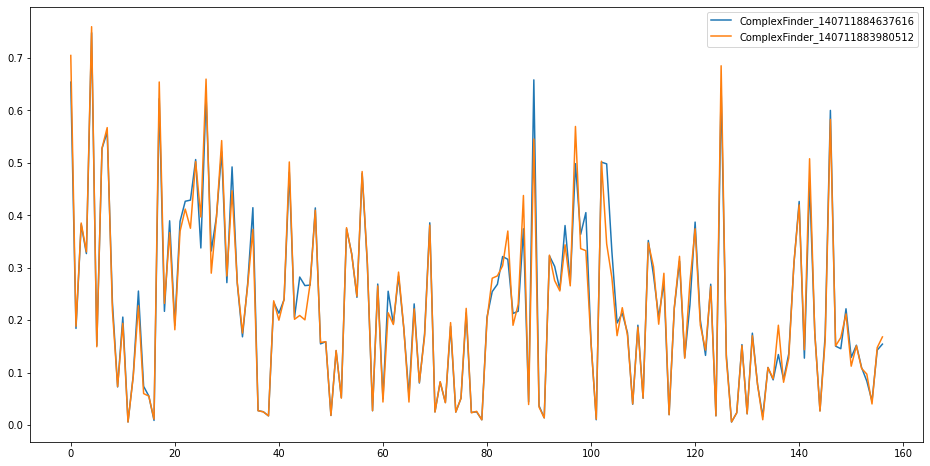

In [25]:
stat.take([mcc_120c_500k_h250, mcc_120c_500k_h1000]).as_plot()

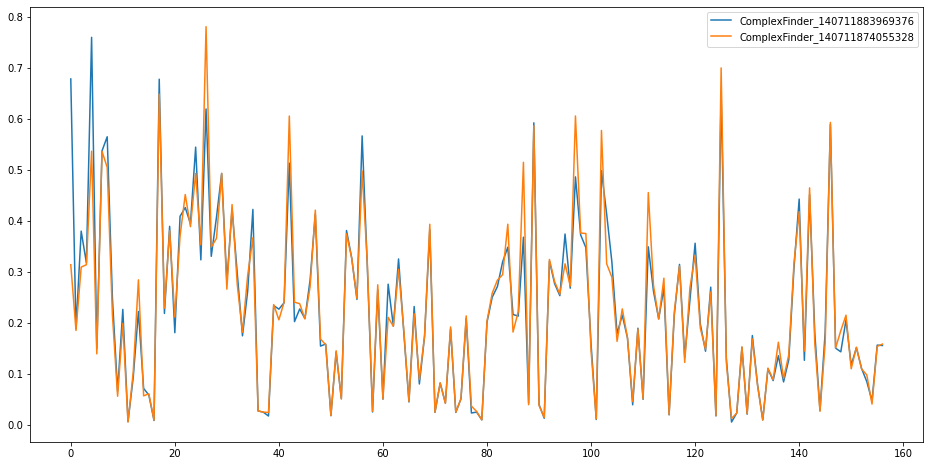

In [26]:
stat.take([mcc_120c_500k_h500, mcc_120c_500k_h2600]).as_plot()

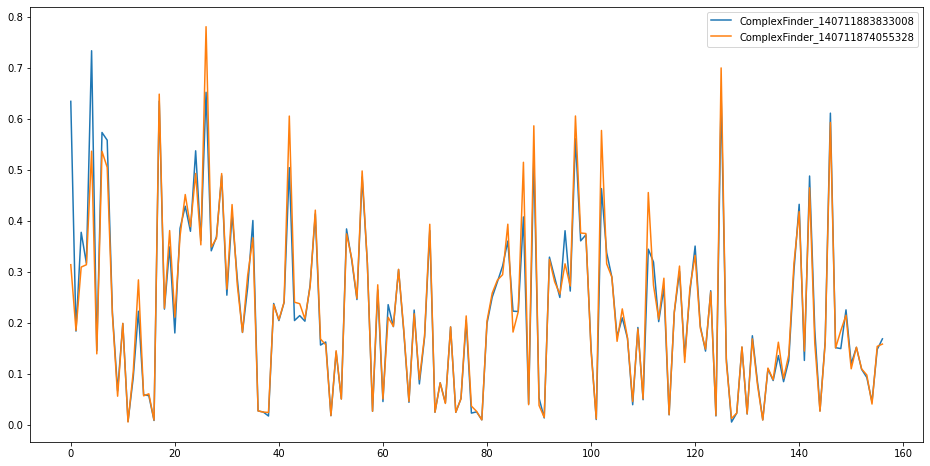

In [27]:
stat.take([mcc_120c_500k_h750, mcc_120c_500k_h2600]).as_plot()

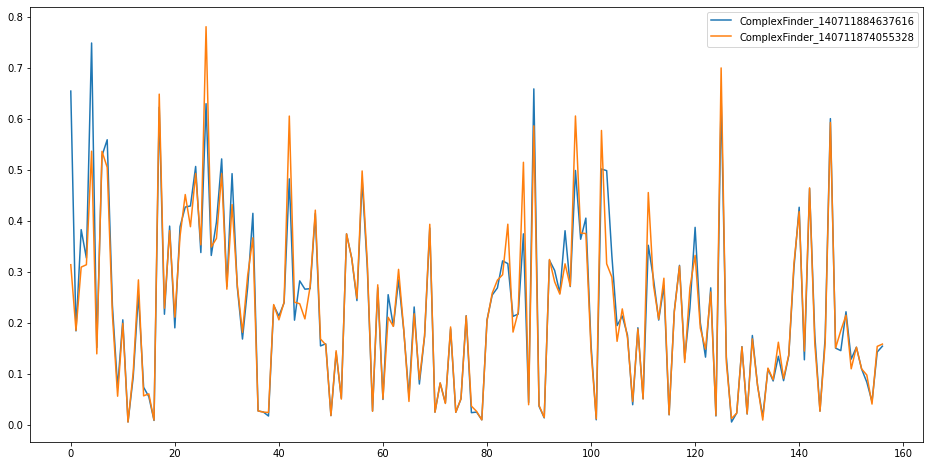

In [34]:
stat.take([mcc_120c_500k_h250, mcc_120c_500k_h2600]).as_plot()

In [16]:
from substrucure_finder.molecule import Molecule

with Path('../data/drives/3/raw_db_2/235/data.rb').open('rb') as stream:
    molecules = Molecule.load_molecules_from_rb_stream(stream)


In [17]:
queries = [mol.smiles for mol in molecules]

In [18]:
queries

['S=P(C([H])([H])C([H])([H])N1C([H])([H])C([H])([H])C([H])([H])C([H])([H])C1([H])[H])(OC([H])([H])C([H])([H])[H])OC([H])([H])C([H])([H])[H]',
 '[Se]1C([H])([H])C([H])([H])N([H])C1([H])C(=O)O[H]',
 '[O-][N+](C(C#CC([H])([H])C([H])([H])C([H])([H])C([H])([H])[H])(C([H])([H])[H])C([H])([H])[H])=O',
 'P(C([H])([H])OC1([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])O1)(=O)(OC([H])([H])[H])OC([H])([H])[H]',
 '[O-][N+](C([H])(C([H])([H])[H])C([H])([H])N=[N+]=[N-])=O',
 '[Si](C([H])([H])[H])(C([H])([H])[H])([N-]C(C([H])([H])[H])(C([H])([H])[H])C([H])([H])[H])[N-]C(C([H])([H])[H])(C([H])([H])[H])C([H])([H])[H].[Li+].[Li+]',
 '[s]1c([H])c(c(c1[H])OC([H])([H])C([H])([H])[H])N([H])[H]',
 '[Sn](C([H])([H])[H])(C([H])([H])[H])(C([H])([H])[H])C([H])([H])P(=O)(OC([H])([H])C([H])([H])[H])OC([H])([H])C([H])([H])[H]',
 '[Si](C([H])([H])[H])(C([H])([H])[H])(C([H])([H])[H])N(C(C([H])([H])[H])(C([H])([H])[H])C([H])([H])[H])[Si](F)(F)F',
 '[Si](C([H])([H])[H])(C([H])([H])[H])(C([H])([H])[H])N(C(C([H])([H])[H

In [20]:
from fp_utils.draw import MoleculeDrawer

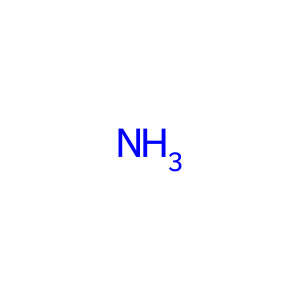

In [26]:
query = 'N'
# query = queries[0]
MoleculeDrawer.draw_one(query)

In [27]:
answers = search(query, finder, ans_count=10)

3.316s -- search


In [28]:
len(answers)

10

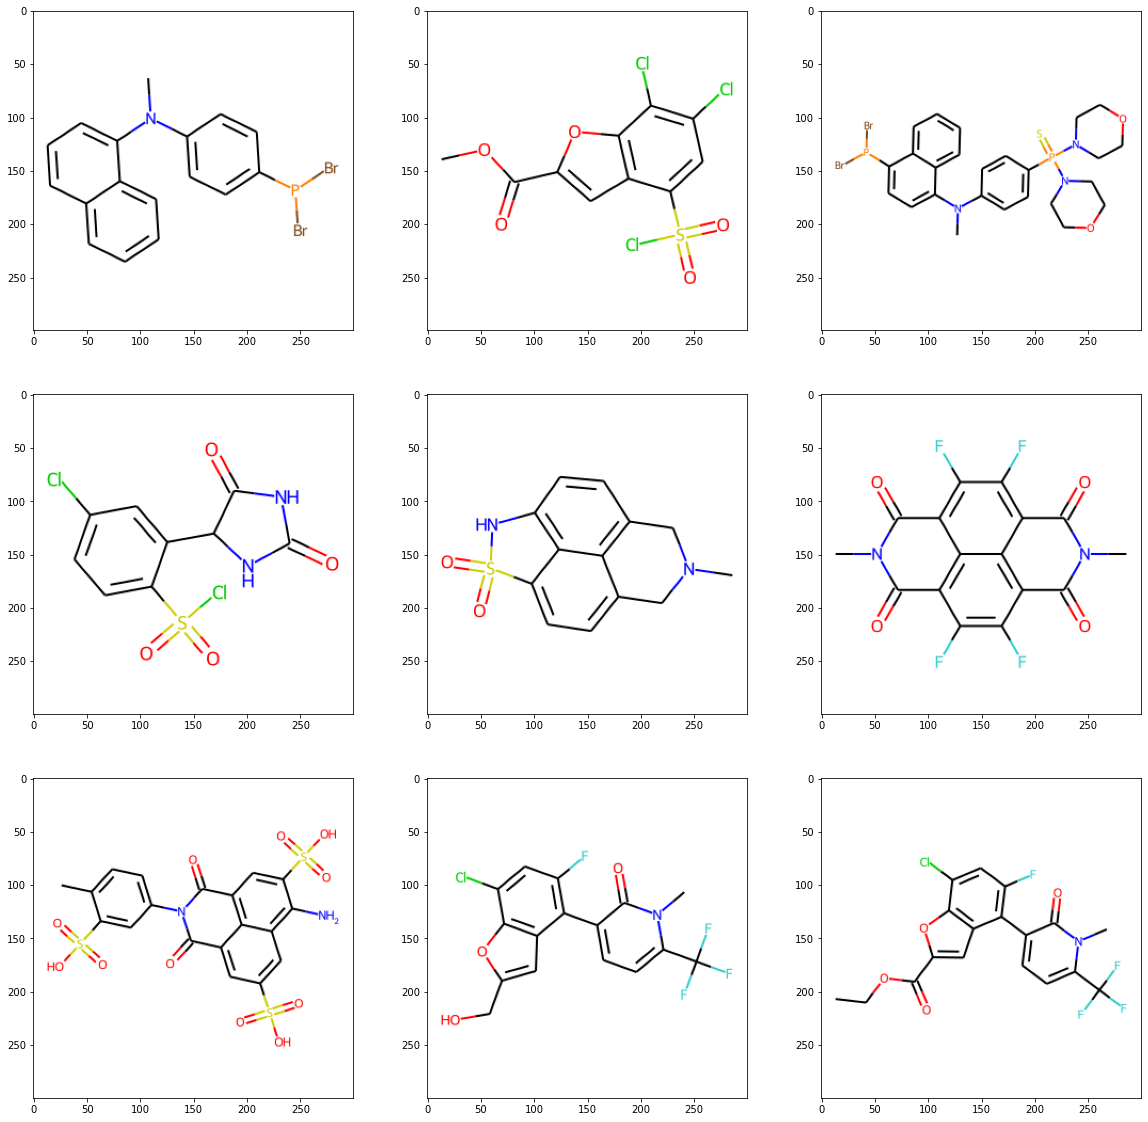

In [29]:
MoleculeDrawer.draw_many(answers, figsize=(20, 20), shape=(3, 3))